<a href="https://colab.research.google.com/github/YuriiKlim/Camp_test_tasks/blob/Tasks_with_comments/Test_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# **Task 1**

Generate the sequence of 20 random integer values from 0 to 100.
Build the plot that joins each neighbour's values
Consider the values as the heights of 2d mountains on which the rain falls
from above. Those subsequences that have larger values on boundaries
form the lakes.

1.   Develop the function that accepts the list of provided 20 integer
values and calculates the depth of the deepest lake. Considering the
2.   Visualize the values as heights and highlight the deepest lake.

**Response format:**

1.   Generating list of 20 random values
2.   Function that calculates the depth of deepest lake
3.   Visualization

In [ ]:
random_values = [random.randint(0, 100) for _ in range(20)]
random_values

[89, 46, 15, 91, 19, 1, 32, 65, 40, 9, 3, 65, 80, 90, 37, 51, 54, 36, 17, 54]

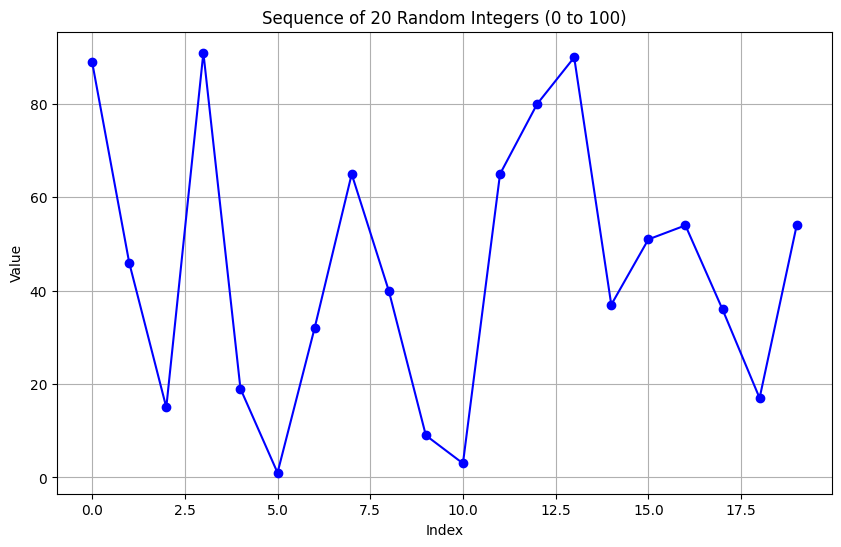

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(random_values, marker='o', linestyle='-', color='blue')
plt.title("Sequence of 20 Random Integers (0 to 100)")
plt.xlabel("Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()

In [ ]:
def find_deepest_lake(random_values):
    """
    Identifies the deepest lake in a mountain profile.

    Parameters
    ----------
    random_values: list
        sequence of random integer values
    ----------

    Iterates over all valid index pairs (i, j) with at least one element in between,
    using the lower of the two boundary heights as the water level.
    If every value in the valley between i and j is below this water level,
    it computes the lake's depth as the difference between the water level and the valley’s minimum.
    The function then updates the maximum depth and records the corresponding indices.

    Returns
    -------
    max_depth: int
        representing the maximum depth of a valid lake found.
    best_bounds: tuple (i, j)
        containing the indices of the left and right boundaries of that deepest lake.
    If no lake is found, it returns (0, None).
    """
    n = len(random_values)
    max_depth = 0
    best_bounds = None

    for i in range(n):                    # Loop over all possible starting and ending indices for the right and left boundary,
        for j in range(i + 2, n):         # ensuring at least one element in between (i + 2 guarantees that)

            water_level = min(random_values[i], random_values[j])
            valley = random_values[i+1:j]

            if all(point < water_level for point in valley):
                valley_min = min(valley)
                depth = water_level - valley_min

                if depth > max_depth:
                    max_depth = depth
                    best_bounds = (i, j)
    return max_depth, best_bounds

In [ ]:
find_deepest_lake(random_values)

(89, (3, 13))

In [ ]:
def plot_deepest_lake(random_values, lake_bounds):
    """
    Visualizes a series of values as a line plot and highlights the deepest lake if one is found.

    Parameters
    ----------
    random_values: list
        sequence of random integer values
    lake_bounds: tuple
        indices (i, j)
    ----------

    Creates an x-axis corresponding to the indices of random_values.
    If lake_bounds is provided:
      - computes the water level as the minimum of the two boundary values (water_level).
      - finds the valley bottom by taking the minimum value between these boundaries and identifies its index (valley_bottom).
      - then plots the lake boundary (all points between indices i and j) with a red line.
      - horizontal dashed lines are drawn at the water level and the valley bottom for visual reference.
    If no lake is found (lake_bounds is None), a message "No lake found" is displayed in the plot.

    Finally, the function adds a title, axis labels, a grid, and a legend, then displays the plot.
    """
    x = list(range(len(random_values)))
    plt.figure(figsize=(10, 6))

    plt.plot(x, random_values, marker='o', linestyle='-', color='blue', label='Random Values')


    # If lake_bounds is provided, highlight it.
    if lake_bounds is not None:

        i, j = lake_bounds
        water_level = min(random_values[i], random_values[j])
        valley_bottom = min(random_values[i+1:j])
        bottom_index = random_values.index(valley_bottom, i+1, j)   # Get the index of the valley bottom within the specified range.

        plt.plot(range(i, j+1), random_values[i:j+1], marker='o', linestyle='-', color='red', label='Lake Boundary')

        plt.axhline(water_level, color='blue', linestyle=':', label='Water Level')
        plt.axhline(valley_bottom, color='green', linestyle=':', label='Lake Bottom')

    else:
        plt.text(0.5, 0.5, 'No lake found', horizontalalignment='center',
                 verticalalignment='center', transform=plt.gca().transAxes, fontsize=16, color='blue')

    plt.title("Random Values and Deepest Lake")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.show()

In [ ]:
depth, lake_bounds = find_deepest_lake(random_values)
if lake_bounds:
    print("Deepest Lake Depth:", depth)
    print("Deepest Lake Boundaries (indices):", lake_bounds)
else:
    print("No lake found.")

Deepest Lake Depth: 89
Deepest Lake Boundaries (indices): (3, 13)


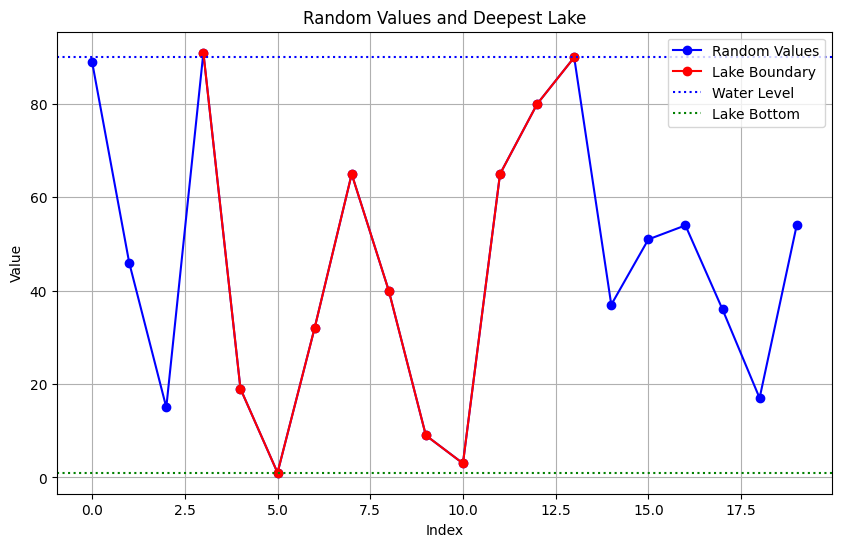

In [ ]:
plot_deepest_lake(random_values, lake_bounds)

# **Task 2**

Consider the matrix of size 20 x 20 filled randomly with binary values 0
(cell is “dead”) or 1 (cell is “alive”).
1. Develop the algorithm that accepts the specified binary array of size
20x20 and iterates the steps where each step executes the following
rules:
* If a living cell has two or three living neighbors, it remains alive;
* if a living cell has one or no living neighbors, it dies of
"loneliness";
* if a living cell has four or more living neighbors, it dies from
"overpopulation";
* if a dead cell has exactly three living neighbors, it comes to life.
2. (Optionally) visualize the process of execution steps.

Response format:

Programming code in jupyter notebook/colab/etc. containing the following:
1. Generating the matrix of size 20x20 with binary random values
2. Algorithm that executes iterations over rules
3. Matrix of values after 20 executed steps
4. (Optionally) visualization of results over iteration process

In [2]:
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
from IPython.display import HTML # To animate process in colab

In [9]:
grid = np.random.randint(0, 2, (20, 20))
print(grid)

[[0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1]
 [0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1]
 [1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1]
 [1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1]
 [1 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1]
 [1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 1]
 [1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1]
 [0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1]
 [1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0]
 [0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1]
 [1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1]
 [1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1]
 [1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1]
 [1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1]
 [1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1]
 [1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0]]


In [10]:
def update_state(current_grid):
    """
    Computes the next state of a grid (John Conway's Game of Life)

    Parameters
    ----------
    current_grid: ndarray
        matrix filled with binary values 0 or 1
    ----------

    It works as follows:
    1. It initializes a new grid (new_grid) of the same shape as the current grid, filled with zeros
    2. For each cell in the current grid, it counts the number of living neighbors by checking all eight adjacent cells
    3. It then applies the rules:
      - If the cell is alive (value 1) and has 2 or 3 living neighbors, it remains alive, otherwise, it dies
      - If the cell is dead (value 0) and has exactly 3 living neighbors, it becomes alive, otherwise, it stays dead

    Returns
    -------
    new_grid: ndarray
        the next matrix iteration after all rules have been executed

    """
    rows, cols = current_grid.shape
    new_grid = np.zeros((rows, cols), dtype=int)

    for i in range(rows):
        for j in range(cols):
            living_neighbors = 0
            for di in [-1, 0, 1]:             # Iterate over the row offsets (-1, 0, 1) to check neighbors
                for dj in [-1, 0, 1]:         # Iterate over the column offsets (-1, 0, 1) to check neighbors
                    if di == 0 and dj == 0:   # Skip the cell itself (offset (0, 0))
                        continue
                    ni, nj = i + di, j + dj   # Compute the neighbor's row index (ni) and column index (nj)
                    if 0 <= ni < rows and 0 <= nj < cols:           # Check if the neighbor is within the grid boundaries
                        living_neighbors += current_grid[ni, nj]    # Add the neighbor's value (0 or 1) to the living_neighbors counter

            # Main "game"
            if current_grid[i, j] == 1:
                if living_neighbors == 2 or living_neighbors == 3:
                    new_grid[i, j] = 1
                else:
                    new_grid[i, j] = 0
            else:
                if living_neighbors == 3:
                    new_grid[i, j] = 1
                else:
                    new_grid[i, j] = 0
    return new_grid

In [13]:
steps = 50 # To see the final result

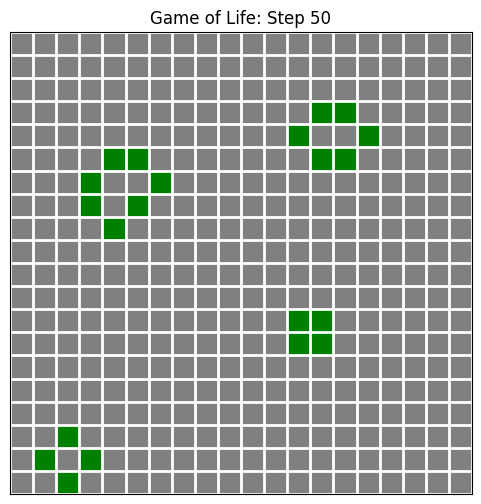

In [16]:
current_grid = grid.copy()
for step in range(steps):
    current_grid = update_state(current_grid)

# Create a separate copy of the original grid for the animation
grid_for_anim = grid.copy()

fig, ax = plt.subplots(figsize=(6, 6))
cmap = ListedColormap(["gray", "green"])
im = ax.imshow(grid_for_anim, cmap=cmap)

# Loop to draw grid lines for all row and column boundaries
rows, cols = grid_for_anim.shape
for i in range(rows + 1):
    ax.axhline(i - 0.5, color='white', linewidth=2)
for j in range(cols + 1):
    ax.axvline(j - 0.5, color='white', linewidth=2)

# Remove tick marks
ax.set_xticks([])
ax.set_yticks([])

ax.set_title("Game of Life: Step 0")

# animation function to update the plot for each frame
def animate(frame):
    global grid_for_anim
    grid_for_anim = update_state(grid_for_anim)
    im.set_data(grid_for_anim)
    ax.set_title("Game of Life: Step {}".format(frame + 1))
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=steps, interval=500, blit=True, repeat=True)

# Convert the animation to HTML format for display in environments like Google Colab
HTML(ani.to_jshtml())

# **Task 3**

The probability of outcome ‘H’ (‘Head’) at flipping each of the 5 coins (call
them m1, m2, m3, m4, m5) with a changed center of gravity equal [0.8, 0.9,
0.1, 0.2, 0.3] respectively. One of the coins was chosen at random and the
tests began. Determine the probability of ‘H’ in the next flip after 9 of the
actual tests: [H T H H H T T H H] (here ‘T’(‘Tail’) is opposite side of the
coin).

For example, before the first test, the probability of "H" is 0.46 (according to
the formula of full probability, taking into account the equivalence of the
choice of one of the available coins). After the flip of ‘H’ in the first test, the
probability of the hypothesis that the selected coin is m3 / m4 / m5
decreased, and probabilities of hypothesis that m1 / m2, increased
compared to initial 0.2 probability for each coin.

Therefore, the probability to flip ‘H’ in the next test now equals to ~ 0.69.
Similarly, after the evidence of ‘T’ in the next test, you need to re-compute
the probability of flipping ‘H’ in the third flip, etc.

Response format:
* list of probabilities to the nearest hundredth [0.69,?,? ,?,?,?,?,?,?]
(replace ‘?’ with the appropriate values)
* Program code, or description

In [22]:
p_heads = np.array([0.8, 0.9, 0.1, 0.2, 0.3])

prior = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

evidence = ['H', 'T', 'H', 'H', 'H', 'T', 'T', 'H', 'H']

predicted_probs = []  # Storage of predictions

# Iterate over each outcome in the evidence
for outcome in evidence:
    # Set likelihood to p_heads if outcome is 'H', for 'T' use 1 - p_heads
    if outcome == 'H':
        likelihood = p_heads
    elif outcome == 'T':
        likelihood = 1 - p_heads
    else:
        print(f"{outcome} is not part of the coin")

    unnorm = prior * likelihood     # unnormalized weights
    prior = unnorm / unnorm.sum()   # Normalize the weights to update the prior

    pred = (prior * p_heads).sum()  # Predict for H in the next toss

    predicted_probs.append(round(pred, 2))

print("List of predictive probabilities after each test:")
print(predicted_probs)

List of predictive probabilities after each test:
[0.69, 0.44, 0.64, 0.77, 0.82, 0.73, 0.55, 0.69, 0.77]
